***Zomato Restaurant clustering and sentiment analysis***

# Project Summary

### ***1.Know Your Data***

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
from wordcloud import WordCloud


from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Dataset Loading

In [3]:
#load dataset
hotel_df=pd.read_csv("Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [4]:
#dataset first look restaurant
hotel_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#dataset first look reviews
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
#Dataset rows(Observation) & Columns count(Feature)
print(f'Total observation and feature for restaurant: {hotel_df.shape}')
print(f'Total observation and feature for review: {review_df.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [7]:
#Dataset Info
print('Restaurant Info')
print("\n")
hotel_df.info()
print('='*120)
print("\n")
print("Review Info")
print("\n")
review_df.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)

Expect collections feature in Restaurant Dataset we have very less null values of all other features

In [8]:
# Dataset Duplicate Value Count
print('For Restaurant')
print("\n")
print(f"Data is Duplicated ? {hotel_df.duplicated().value_counts},unique values with {len(hotel_df[hotel_df.duplicated()])} duplication")
print("\n")
print('='*120)
print("\n")
print("for Review")
print("\n")
print(f"Data is Duplicated ? {review_df.duplicated().value_counts},unique values with {len(review_df[review_df.duplicated()])} duplication")

For Restaurant


Data is Duplicated ? <bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
100    False
101    False
102    False
103    False
104    False
Length: 105, dtype: bool>,unique values with 0 duplication




for Review


Data is Duplicated ? <bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>,unique values with 36 duplication


In [9]:
#getting duplicate values
print(f'Duplicate data count = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

Duplicate data count = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [10]:
#checking values for American Wild Wings
review_df[(review_df['Restaurant']=='American Wild Wings')].shape

(100, 7)

In [11]:
#checking values for Arena Eleven
review_df[(review_df['Restaurant']=='Arena Eleven')].shape

(100, 7)

### Missing Values/Null Values

In [12]:
#Missing values/Null Value Count for hotel Data
hotel_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [13]:
#Missing values/Null Value Count for review Data
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

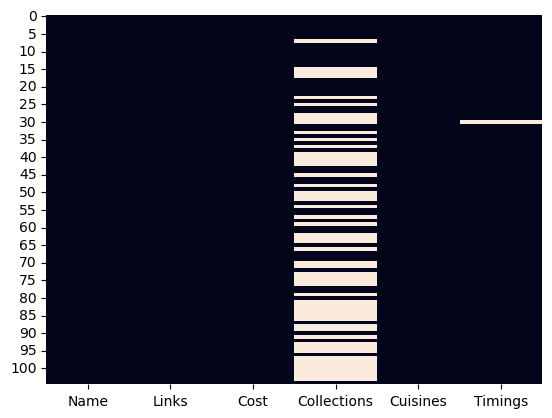

In [14]:
# Visualizing the missing values for restaurant
# Checking Null Value by plotting Heatmap
sns.heatmap(hotel_df.isnull(), cbar=False);

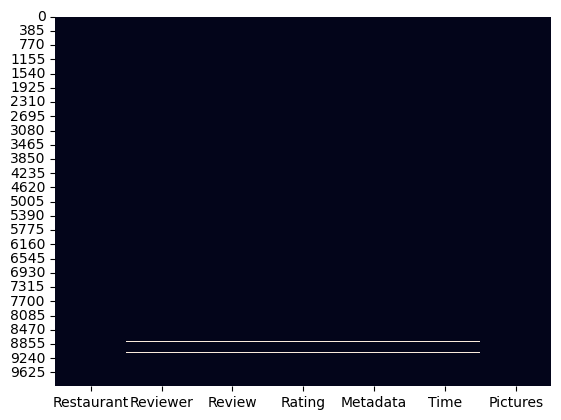

In [15]:
# Visualizing the missing values for Review
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False);

### What do you know about Dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.

### ***2. Understanding Your Variables***

In [16]:
#Dataset Column Restaurant
print(f'Features of Restaurant Dataset = {hotel_df.columns.to_list()}')
#Dataset Column Review
print(f'Features of Review Dataset = {review_df.columns.to_list()}')

Features of Restaurant Dataset = ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features of Review Dataset = ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [17]:
# Dataset Describe restaurant
hotel_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [18]:
# Dataset Describe review
review_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,10000,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,5/5/2019 22:39,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,10000.0,NaN,NaN,NaN,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


### Variables Description

**Attributes ▶**

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review


### Unique value for each variables

In [19]:
#Check unique value for each variable for restaurant
for i in hotel_df.columns.to_list():
    print("No. of Unique values in",i,"is",hotel_df[i].nunique(),".")

No. of Unique values in Name is 105 .
No. of Unique values in Links is 105 .
No. of Unique values in Cost is 29 .
No. of Unique values in Collections is 42 .
No. of Unique values in Cuisines is 92 .
No. of Unique values in Timings is 77 .


In [20]:
#Check unique value for each variable for review
for i in review_df.columns.to_list():
    print("No. of Unique values in",i,"is",review_df[i].nunique(),".")

No. of Unique values in Restaurant is 100 .
No. of Unique values in Reviewer is 7446 .
No. of Unique values in Review is 9364 .
No. of Unique values in Rating is 10 .
No. of Unique values in Metadata is 2477 .
No. of Unique values in Time is 9782 .
No. of Unique values in Pictures is 36 .


### ***3. Data Wrangling***

In [21]:
#creating copy of both dataset so that original data is not ruined
hotelCopy=hotel_df.copy()
reviewCopy=review_df.copy()

In [22]:
#checking for cost values before changing its datatype
hotelCopy['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [23]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotelCopy['Cost'] = hotelCopy['Cost'].str.replace(",","").astype('int64')

In [24]:
#Top 5 most costly restaurant
hotelCopy.sort_values("Cost",ascending=False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [25]:
#Top 5 affordable Restaurant
hotelCopy.sort_values("Cost",ascending=False)[['Name','Cost']][-5:]

,Name,Cost
54,Asian Meal Box,200
101,Sweet Basket,200
85,Momos Delight,200
23,Amul,150
89,Mohammedia Shawarma,150


In [26]:
#Hotels that share same price
hotel_dict={}
amount=hotelCopy.Cost.values.tolist()

#adding hotel name based on price by converting it into list
for price in amount:
    #get all the rows that have the current price
    rows=hotelCopy[hotelCopy['Cost']==price]
    hotel_dict[price]=rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(columns={'index':'Cost',0:'Name of Restaurants'})

#getting hotel count
hotel_count=hotelCopy.groupby('Cost')['Name'].count().reset_index().sort_values('Cost',ascending=False)

#merging together
same_price_hotel_df=same_price_hotel_df.merge(hotel_count,how='inner',on='Cost').rename(columns={'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant',ascending=False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
6,1000,"[Hyper Local, Tiki Shack, Pista House, La La L...",6


In [27]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [28]:
# spliting the cusines and storing in list 
cuisine_value_list = hotelCopy.Cuisines.str.split(', ')
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [29]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

# cuisine_dict

In [30]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

# cuisine_df[:5]

In [31]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
7,Asian,15


In [32]:
# spliting the cusines and storing in list 
Collections_value_list = hotelCopy.Collections.dropna().str.split(', ')
# Collections_value_list

In [33]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [34]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number of Restaurants'})

#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


In [35]:
#in order to change data type for rating checking values
reviewCopy.Rating.value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [36]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
reviewCopy.loc[reviewCopy['Rating'] == 'Like'] = 0
#changing data type for rating in reviewCopy data
reviewCopy['Rating'] = reviewCopy['Rating'].astype('float')

In [37]:
#since there is one rating as like converting it to median
reviewCopy.loc[reviewCopy['Rating'] == 0] = reviewCopy.Rating.median()

In [38]:
reviewCopy

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [39]:
reviewCopy['Reviewer_Total_Review']=reviewCopy['Metadata'].str.split(',',expand=True)[0]
reviewCopy['Reviewer_Followers']=reviewCopy['Metadata'].str.split(',', expand=True)[1]

reviewCopy['Reviewer_Total_Review'] = pd.to_numeric(reviewCopy['Reviewer_Total_Review'].str.split(' ',expand=True)[0])
reviewCopy['Reviewer_Followers'] = pd.to_numeric(reviewCopy['Reviewer_Followers'].str.split(' ').str[1])


In [40]:
reviewCopy

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53.0,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2.0,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65.0,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13.0,144.0


In [41]:
#changing date and extracting few feature for manipulation

# 'errors='coerce'' will turn any invalid date formats into 'NaT' (Not a Time), preventing the code from crashing.
reviewCopy['Time']=pd.to_datetime(reviewCopy['Time'],errors='coerce')
reviewCopy['Review_Year'] = pd.DatetimeIndex(reviewCopy['Time']).year
reviewCopy['Review_Month'] = pd.DatetimeIndex(reviewCopy['Time']).month
reviewCopy['Review_Hour'] = pd.DatetimeIndex(reviewCopy['Time']).hour

In [42]:
#Average engagement of restaurants
#Calculating the average rating and total number of reviews for each restaurant.
#This helps us identify the most popular and highly-rated restaurants.
avg_hotel_rating=reviewCopy.groupby('Restaurant').agg({'Rating':'mean','Reviewer':'count'}).reset_index().rename(columns={'Reviewer':'Total_Review'})

avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.0,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [43]:
#usless data
reviewCopy[reviewCopy['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.0,4.0,4.0,4.0,4.0,NaT,4,NaN,NaN,NaN,NaN,NaN


In [44]:
#checking hotel count as total hotel in restaurant data was 105
reviewCopy.Restaurant.nunique()

101

In [45]:
#finding hotel without review
hotel_without_review=[name for name in hotelCopy.Name.unique().tolist() if name not in reviewCopy.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [46]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating',ascending=False)[:5] 

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [47]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating',ascending=True)[:5] 

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.400,100
11,Asian Meal Box,2.580,100
67,Pakwaan Grand,2.710,100
58,Mathura Vilas,2.820,100
15,Behrouz Biryani,2.825,100


In [48]:
#finding the most followed critic
most_followed_reviewer=reviewCopy.groupby('Reviewer').agg({'Reviewer_Total_Review':'max','Reviewer_Followers':'max','Rating':'mean'}).reset_index().rename(columns={'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers',ascending=False)

most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.0,13410.0,3.666667
1702,Eat_vth_me,60.0,13320.0,5.000000
5236,Samar Sardar,8.0,11329.0,3.500000
1788,Foodies Hyderabad,31.0,9494.0,4.500000
6230,Srinivas,34.0,7628.0,3.714286


In [49]:
#finding which year to show maximum engagement
hotel_year=reviewCopy.groupby('Review_Year')['Restaurant'].apply(lambda x:x.tolist()).reset_index()
hotel_year['Count']=hotel_year['Restaurant'].apply(lambda x:len(x))
hotel_year

,Review_Year,Restaurant,Count
0,2016.0,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017.0,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018.0,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
3,2019.0,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [50]:
#merging both data frame
hotelCopy=hotelCopy.rename(columns={'Name':'Restaurant'})
merged=hotelCopy.merge(reviewCopy,on='Restaurant')
merged.shape

(9999, 17)

In [51]:
merged.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3.0,2.0,2019.0,5.0,21.0


In [52]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean','Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [53]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending=False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [54]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending=True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


In [55]:
#rating count by reviewer
rating_count_df = pd.DataFrame(reviewCopy.groupby('Reviewer').size(), columns=["Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul	with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of	13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews. 

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do  futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

### ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart-1 Displot for Distribution

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\1588476017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged[col], color = '#055E85', fit = norm);
C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\1588476017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mer

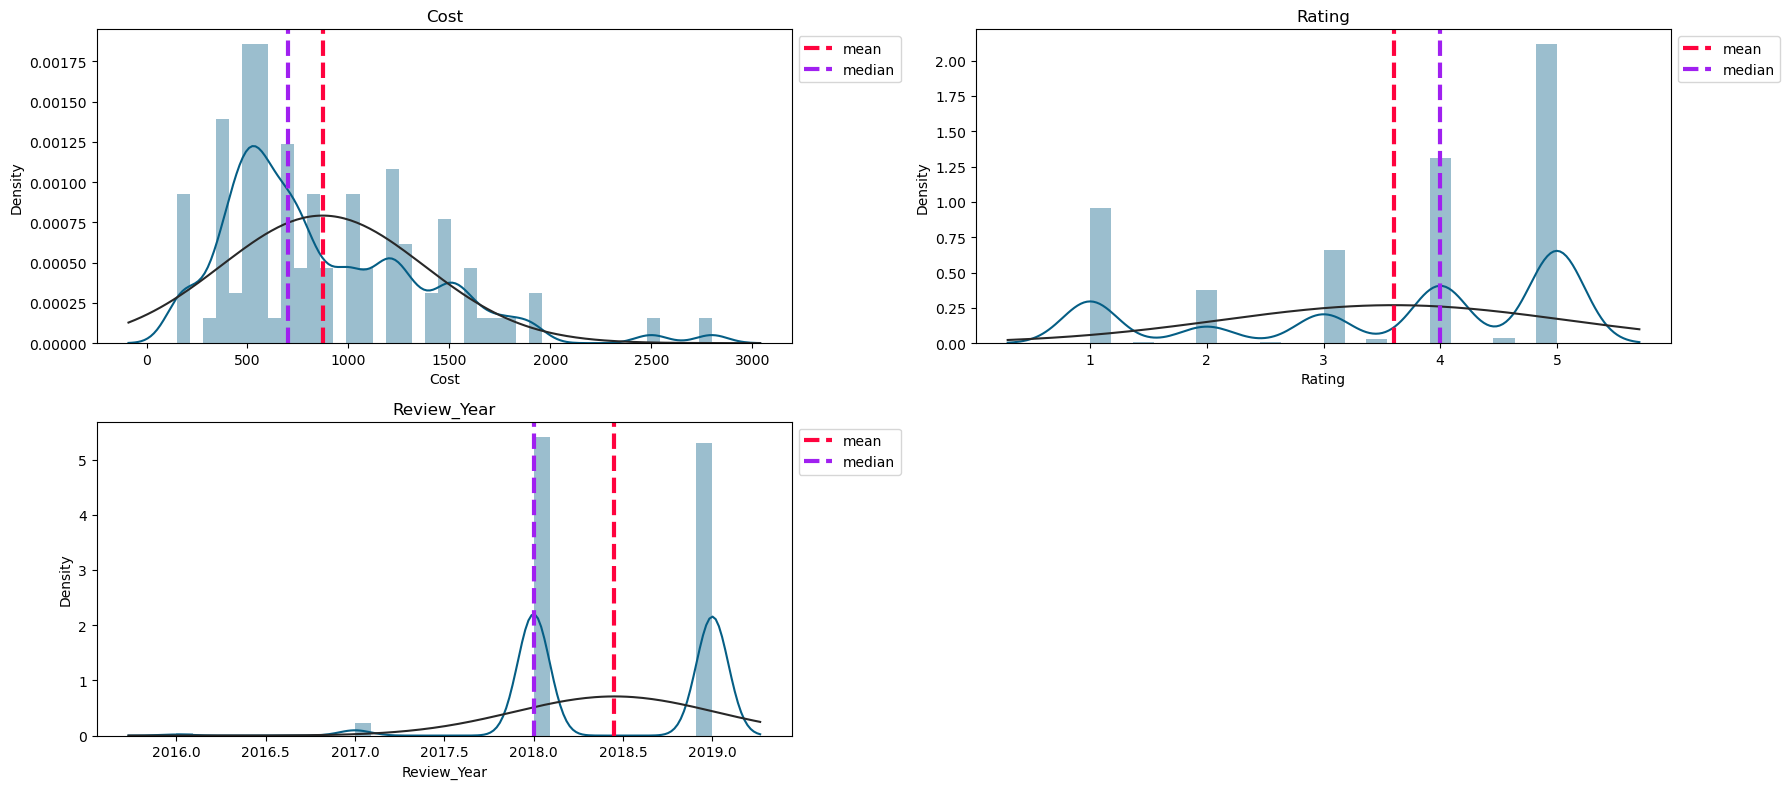

In [56]:
#chart-1 Displot for Distribution
plt.figure(figsize=(18,8))
for i,col in enumerate(['Cost','Rating','Review_Year']):
    plt.subplot(2,2,i+1)
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.title(f'{col.title()}');
    plt.tight_layout();

1. Why were these specific charts chosen?

   The distribution plots (histograms with KDE) were chosen to understand the underlying distribution of key numerical features: Cost, Rating, and Review Year. These plots are essential for identifying skewness, outliers, and the overall shape of the data, which directly influences our analytical approach.

2. What insights were found from the charts?

   Cost: The cost distribution is right-skewed, indicating that the majority of restaurants are in the lower price range. The high-cost outliers pull the mean up, making the median a more reliable measure of the typical price.

   Rating: The rating distribution is multimodal, with distinct peaks at specific rating values. This suggests that customers tend to give very high or very low ratings, with fewer ratings falling in the middle.

   Review Year: The data shows a concentration of reviews in the years 2019 and 2018. This temporal insight helps us understand when the platform experienced the most user engagement.

3. Will the gained insights help create a positive business impact?

   Yes, these insights provide a crucial foundation for strategic business decisions. While no single chart can give a complete picture, these distributions help us understand customer behavior and market dynamics.

   Cost Distribution: The right-skewed price distribution shows a strong market for budget-friendly restaurants. This suggests a business could focus marketing efforts on this segment or, conversely, identify a gap in the high-end market that could be exploited.
 
   Rating Distribution: The multimodal rating distribution is a valuable insight. It suggests a lack of consistent service, with customers either loving or hating their experience. A positive business impact could be to identify the restaurants with low ratings and high review counts and implement a targeted strategy to improve their service.

   Review Year Distribution: The surge in reviews in 2018 is a key insight into our growth. By analyzing what campaigns or events took place that year to drive engagement, we can replicate those successful strategies to encourage more customer feedback and increase user activity in the future.

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [57]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

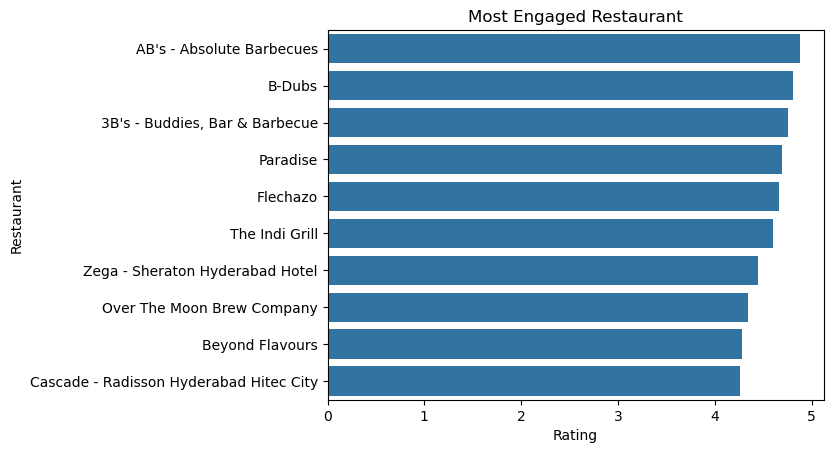

In [58]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

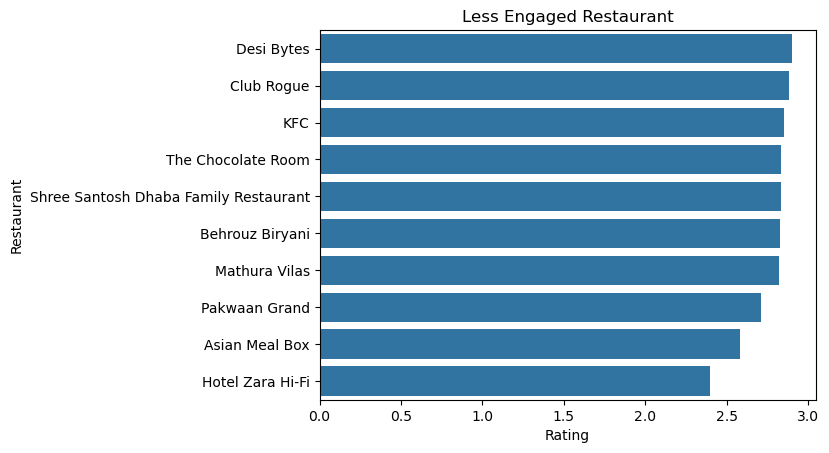

In [59]:
#chart for less liked hotels
sns.barplot(data=most_engaged_hotel[-10:],x='Rating',y='Restaurant')
plt.title("Less Engaged Restaurant")
plt.show()

1. Why did you pick the specific chart?

   I picked barplot for the above graph because it show frequency level for different category.

2. What is/are the insight(s) found from the chart?

   AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

3. Will the gained insights help creating a positive business impact? 
   Are there any insights that lead to negative growth? Justify with specific reason.

   Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

   Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3 Price Point for High Rated and Low Rated Hotels

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\3007898406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant', palette = 'hsv')


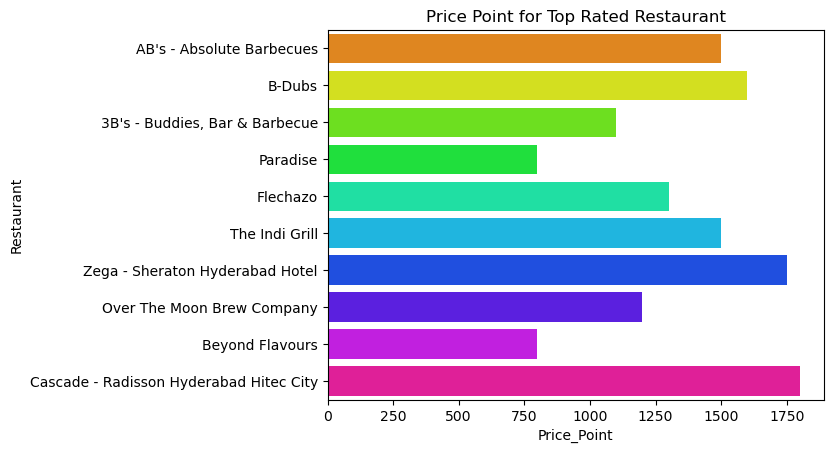

In [60]:
# Chart - 3 visualization code for price point of high rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant', palette = 'hsv')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\3420439983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', y = 'Restaurant',palette = 'hsv')


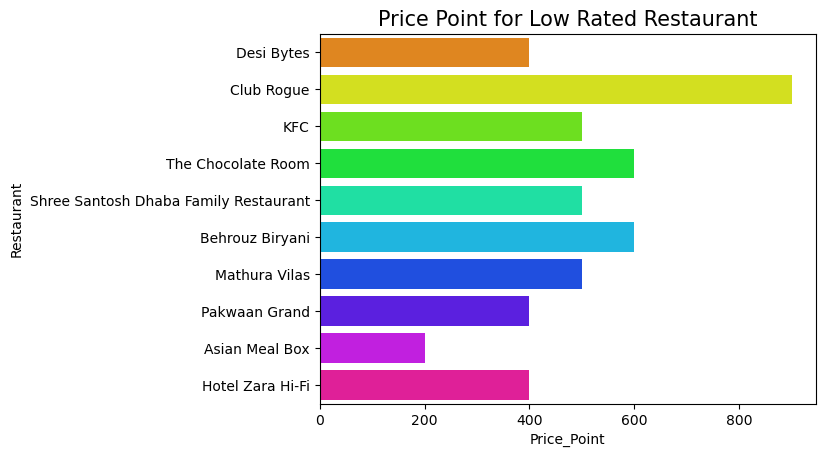

In [61]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Price_Point', y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)
# Setting the background color of the plot
# using set_facecolor() method
# ax = plt.axes()
# ax.set_facecolor("black")
plt.show()


1. Why did you pick the specific chart?

   Here I choose barplot because bar plot is a good choice for plotting hotel name and price point as it is a simple and effective way to display the comparison of different categories (hotel names) and their corresponding values (price points) on the same chart. Also, it allow to have a sense of the price range of each hotel and how they compare to each other.

2. What is/are the insight(s) found from the chart?

   Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Since it is customer centered business i.e., direct to consumer it is important to understand price point which makes this business more affordable for evryone, therefore it is important for business to crack the price point.
   
   Here most liked restaurant has a price point of 1500 which is even though a little high than average but as this business is all about food quality and taste it show maximum engagement which means it serve best quality of food, however deep dive on analysing review text can exactly give why this price point is prefered most.
   
   Some restaurant with lowest rating even with low price point is not making engagement, this may create a negative impact on business.
   
   However it can not be finalized that this hotel should unlisted as there may be chance of different cuisine they both serve and it also depend upon the locality they both serve, therefore based on that small promotional offers can also be given for low rated restaurant to increase sales.

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurant

In [62]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:10]

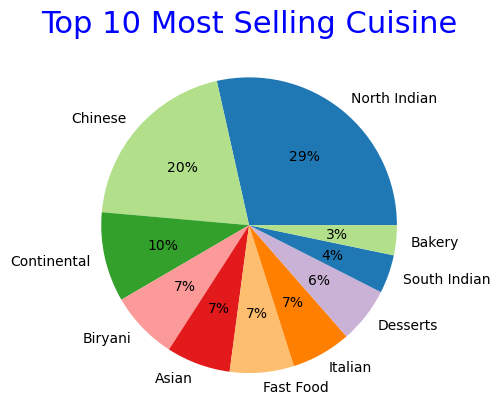

In [63]:
# Chart - 4 visualization code pie chart for top 10 most selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:10]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[1:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 10 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

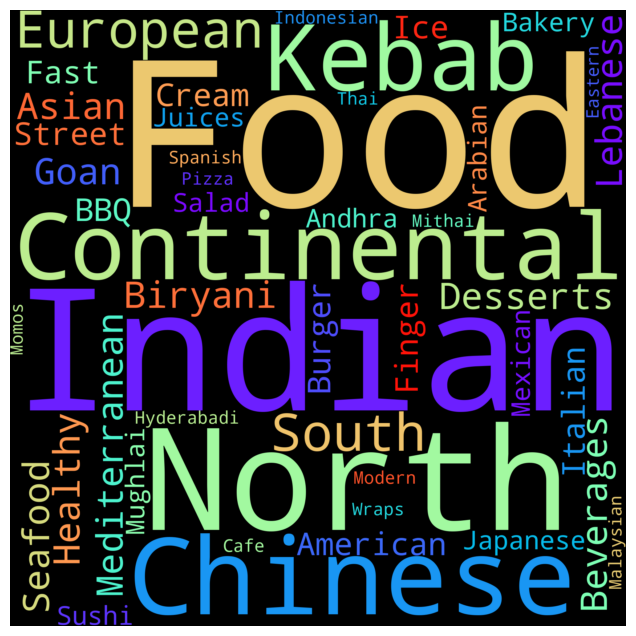

In [64]:
#wordcloud for Cuisine
# storing all cuisine in form of text
plt.figure(figsize=(12,8))
text = " ".join(name for name in cuisine_df.Cuisine )

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");


1. Why did you pick the specific chart?

   Here I choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words.

2. What is/are the insight(s) found from the chart?

   Based on the above chart it is clear that most of the hotel sold North Indian food followed by chinese.
3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.

   Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.

   If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

   Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.
   
   Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

   Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

   However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

   Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

#### Chart - 5 Most used Tags

In [65]:
#list of all collections
collection_list=Collections_df.sort_values('Number of Restaurants',ascending=False)['Tags'].to_list()[:5]

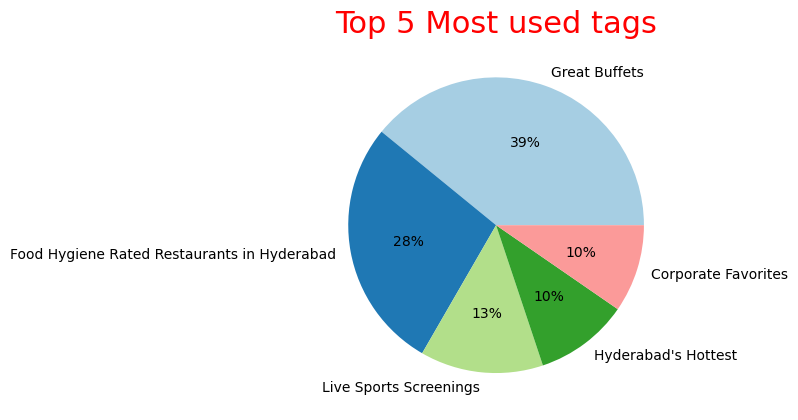

In [66]:
#visualization code pie chart for top 5 most used tags
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most used tags', size =22, color= 'red')
plt.show()

(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

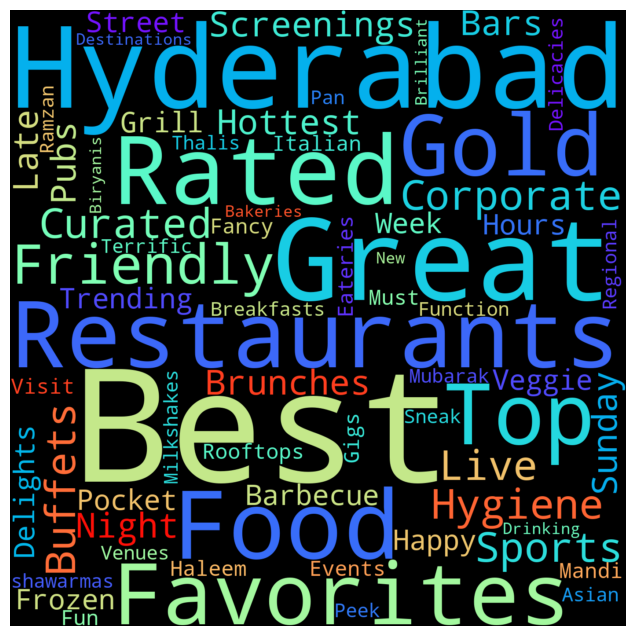

In [67]:
#wordcloud for tags(stroring all tags in form of text)
plt.figure(figsize=(12,8))
text=" ".join(name for name in Collections_df.Tags)

#creating word_clod with text as argument in .generate() method

word_cloud=WordCloud(width=1400,height=1400,collocations=False,colormap='rainbow',background_color='black').generate(text)

#display the generated word cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")

#### What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

#### Chart - 6 Learn about Reviewers

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\4010716068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',y = 'Reviewer', palette='bright')


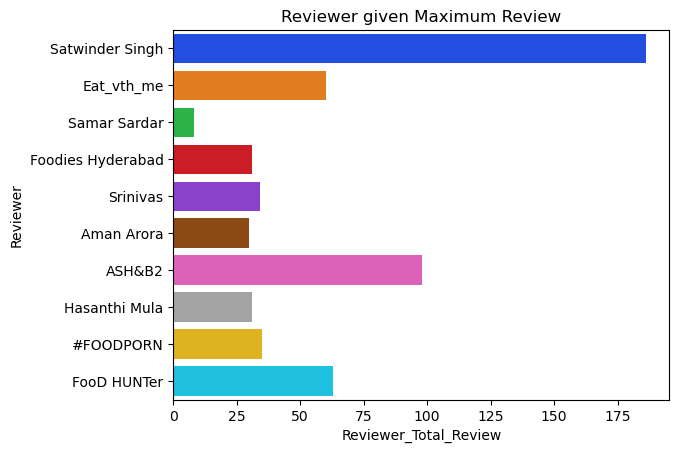

In [68]:
#visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\35815867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', y = 'Reviewer',palette='bright')


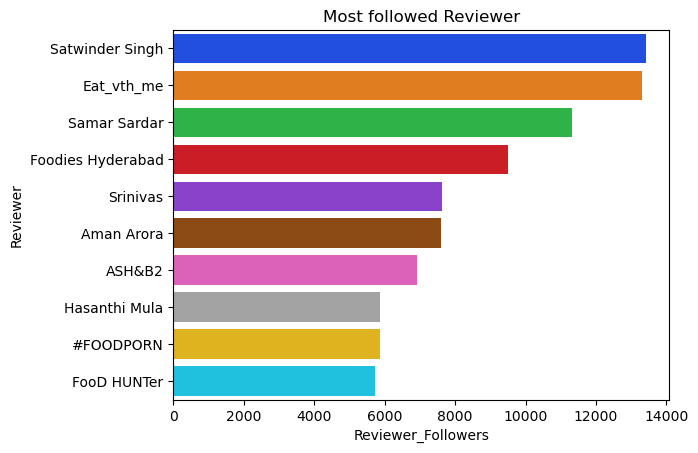

In [69]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\2528814007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', y = 'Reviewer',palette='bright')


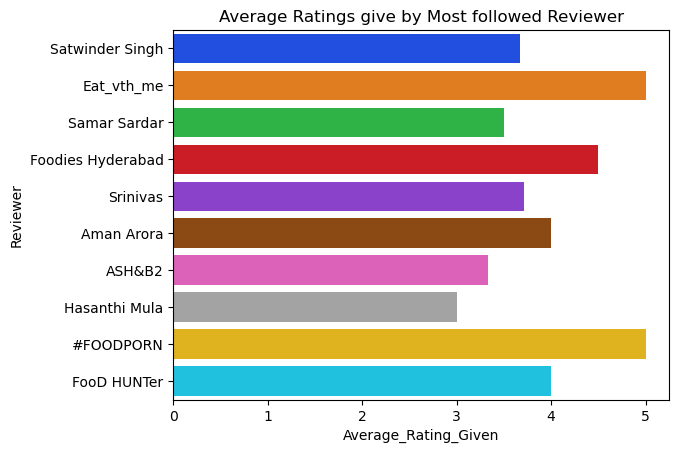

In [70]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()


1. Why did you pick the specific chart?

   Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer. Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

2. What is/are the insight(s) found from the chart?

   Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.
   
3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.
   
   This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.
   It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [71]:
#extracting name and price 

price_of_hotel = hotelCopy.sort_values('Cost', ascending = False)[['Restaurant','Cost']]

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\3683152294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')


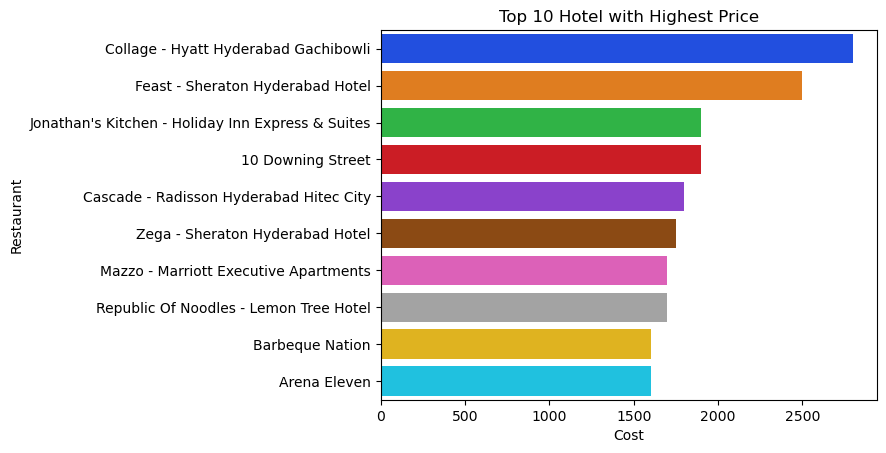

In [72]:
#visualization code for howtel with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\3545604092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')


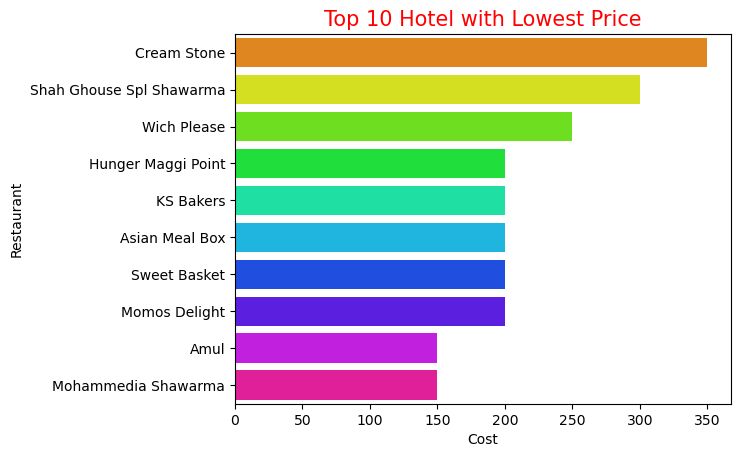

In [73]:
#hotel with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [74]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotelCopy[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']

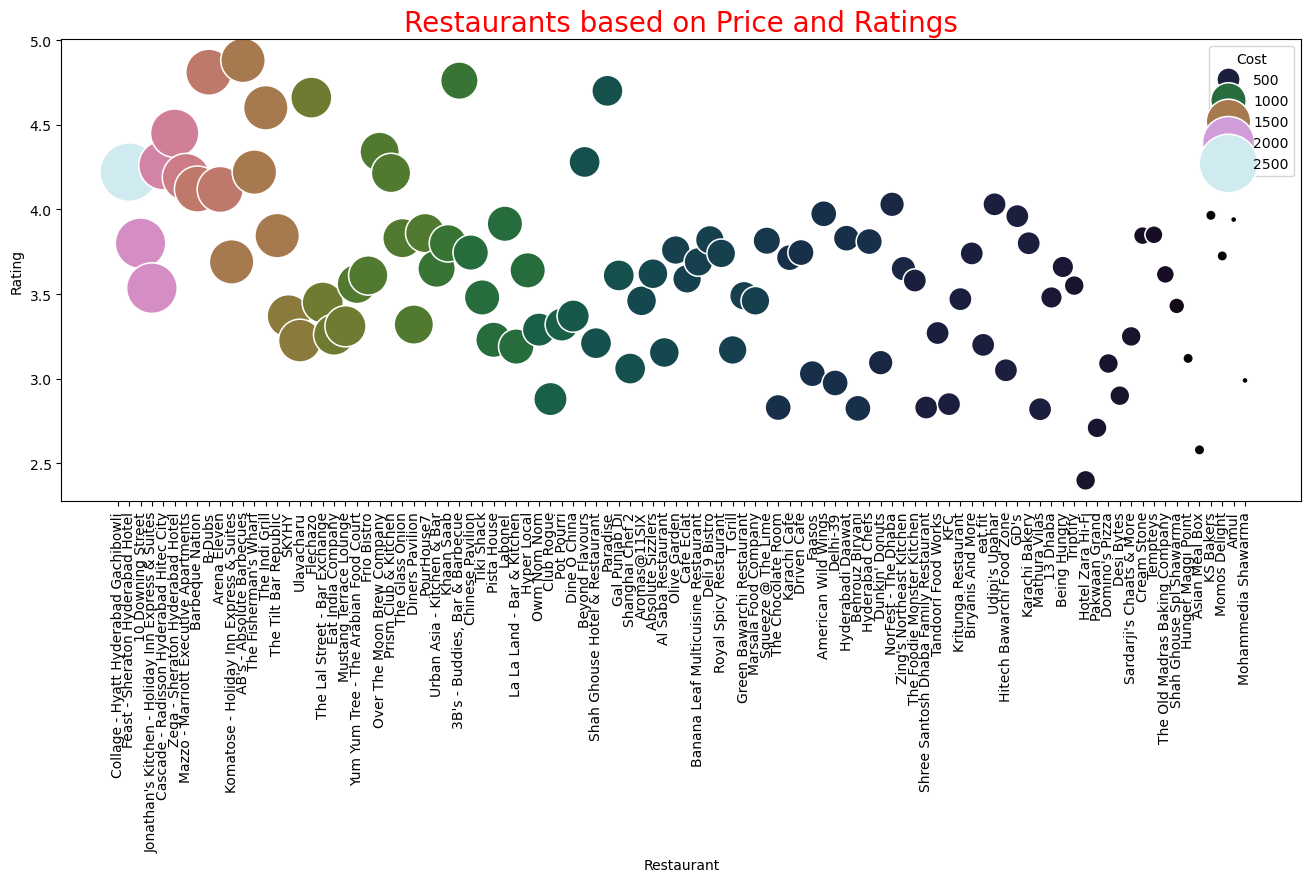

In [75]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", hue = 'Cost',legend=True, sizes=(20, 2000),palette ="cubehelix")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\885259725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rocket")


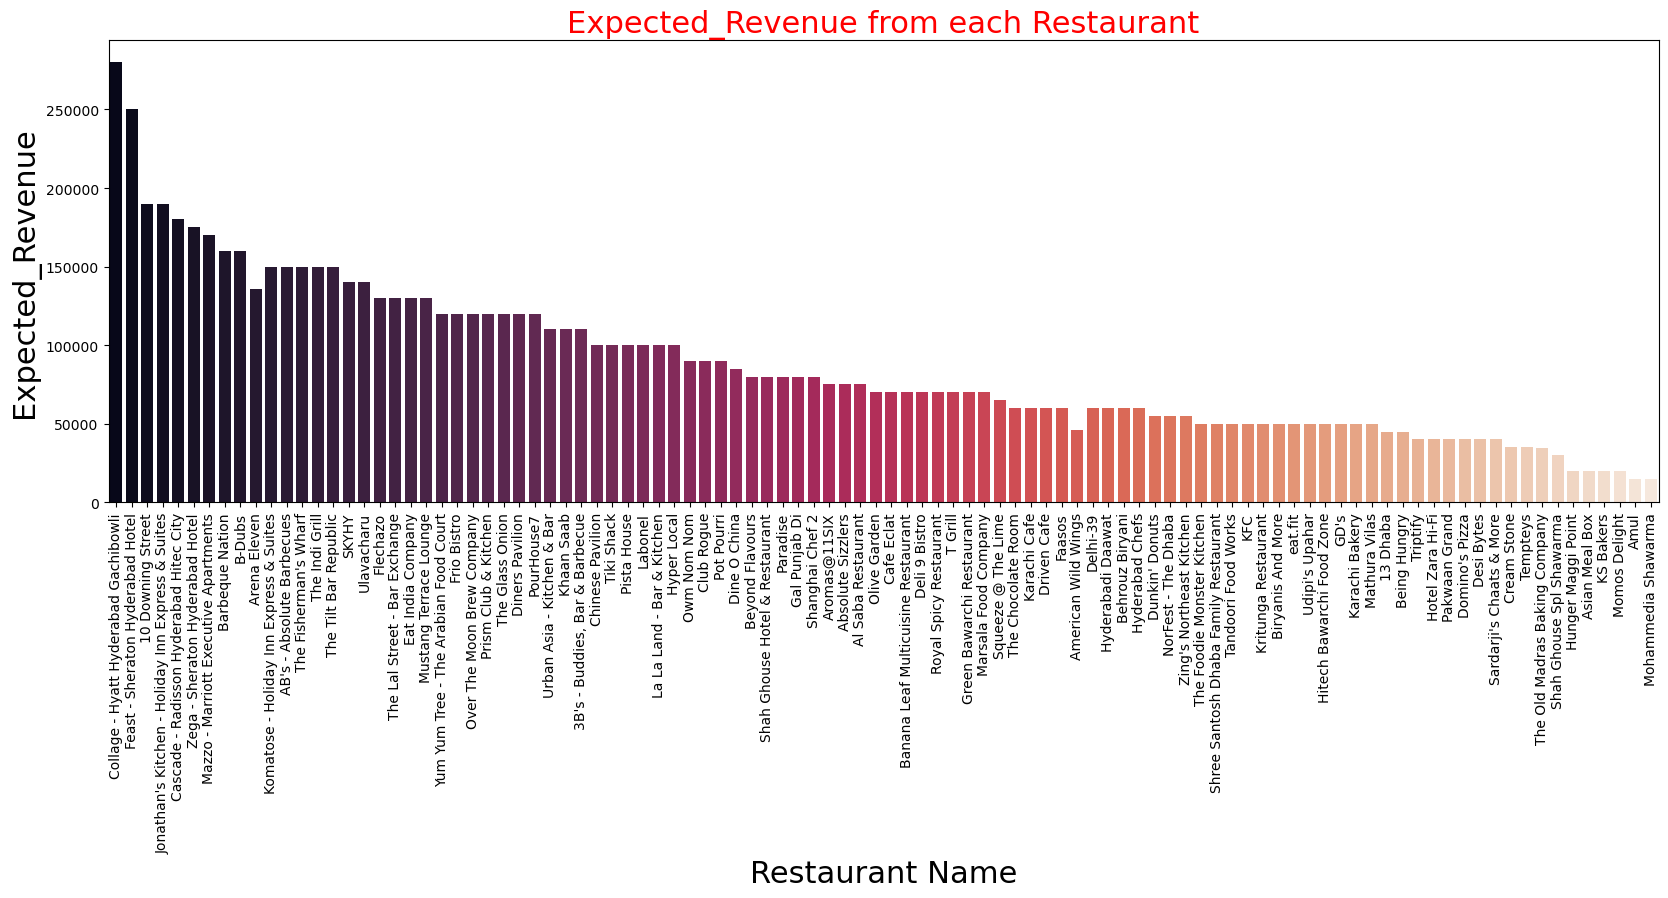

In [76]:
#chart to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rocket")
plt.title("Expected_Revenue from each Restaurant", size = 22,color='red')
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()


1. Why did you pick the specific chart?

   Barplot helps in plotting the frquency of cost for each hotel.

2. What is/are the insight(s) found from the chart?

   Based on the above chart it is clear that restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

3. Will the gained insights help creating a positive business impact?
   Are there any insights that lead to negative growth? Justify with specific reason.

   Most expensive product are always center of attraction for a niche market (subset of the market on which a specific product is focused) at the same time for a business purpose, this product are preffered to be most revenue generating market.
   Definetly for food delivery platform Zomato, it is very important to focus and improve sales based on these hotels.
   Based on the average rating of 3.4 these product should increase their engagement as this may cause negative brand impact. However true behaviour can only be inspected through analysing of reviews.

#### Chart - 8 - Correlation Heatmap

In [77]:
# Convert all columns to numeric, non-numeric columns will become NaN
merged_numeric = merged.apply(pd.to_numeric, errors='coerce')

# Drop columns that were entirely non-numeric (i.e., all NaN after conversion)
merged_numeric = merged_numeric.dropna(axis=1, how='all')

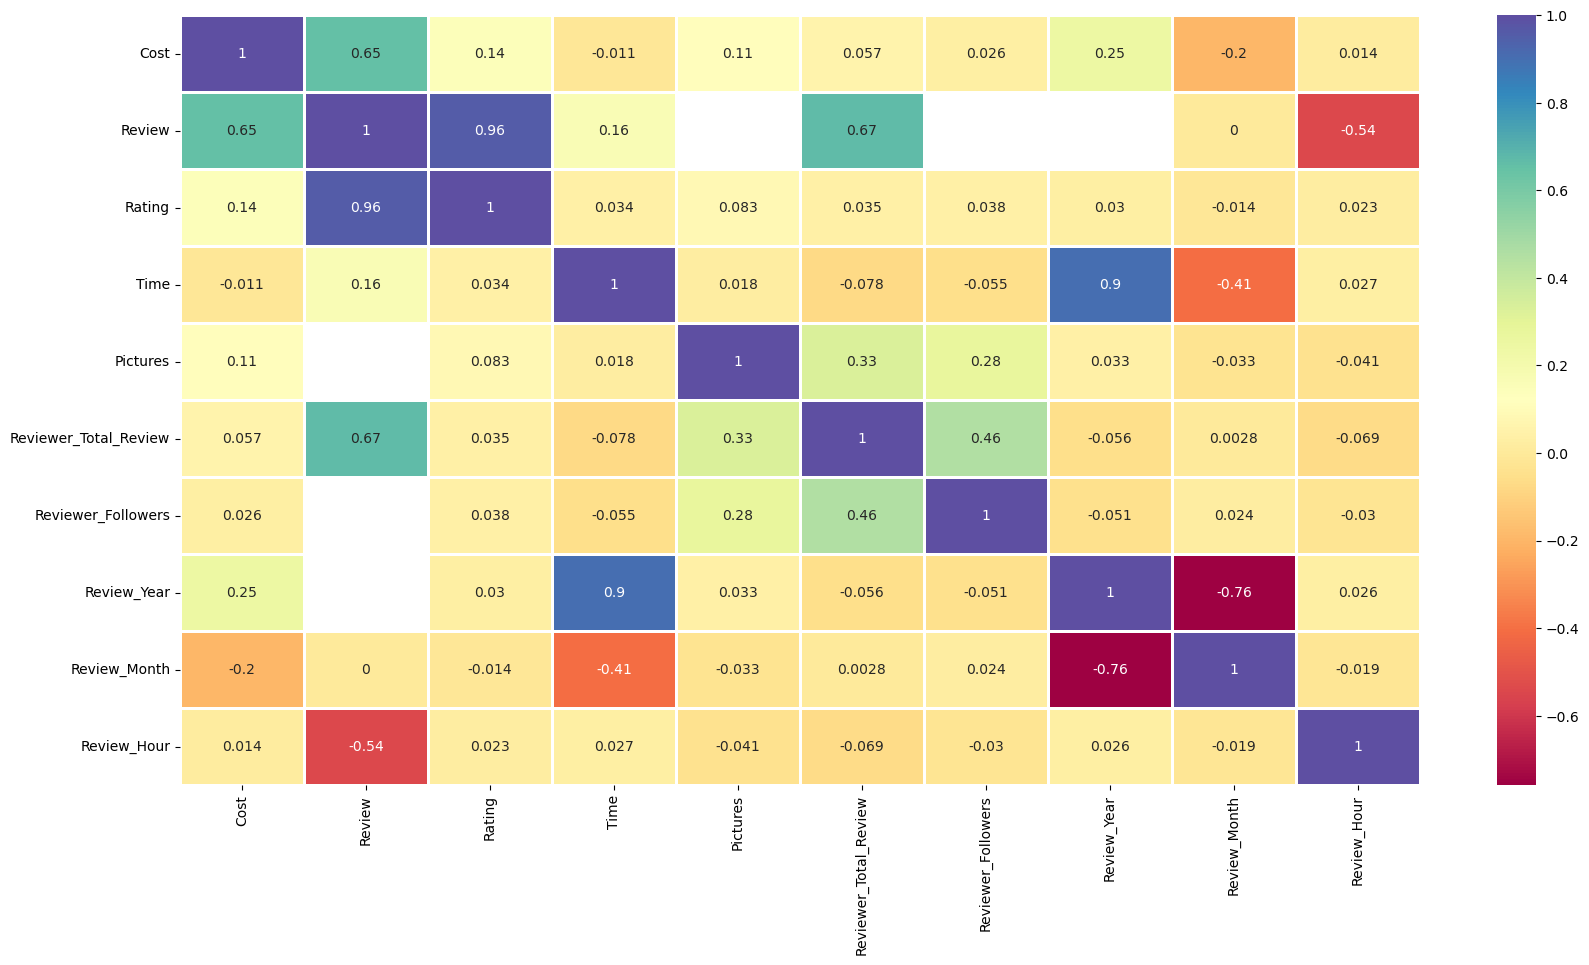

In [78]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_numeric.corr(),ax = ax, annot=True, cmap = 'Spectral', linewidths = 1)

plt.show()

1. Why did you pick the specific chart?

   A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].
   Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

2. What is/are the insight(s) found from the chart?
   
   Feature Importance: The Rating row is the most important if your goal is to predict a restaurant's rating. You can see that Review has a very strong positive correlation (0.96) with Rating, which suggests that the Review feature is a powerful predictor.

   Lack of Relationship: The heatmap shows that Cost has a very weak positive correlation (0.14) with Rating. This is a significant finding. It means that there isn't a strong linear relationship between how expensive a restaurant is and its rating, which is a valuable insight.

### Chart - 9 - Pair Plot 

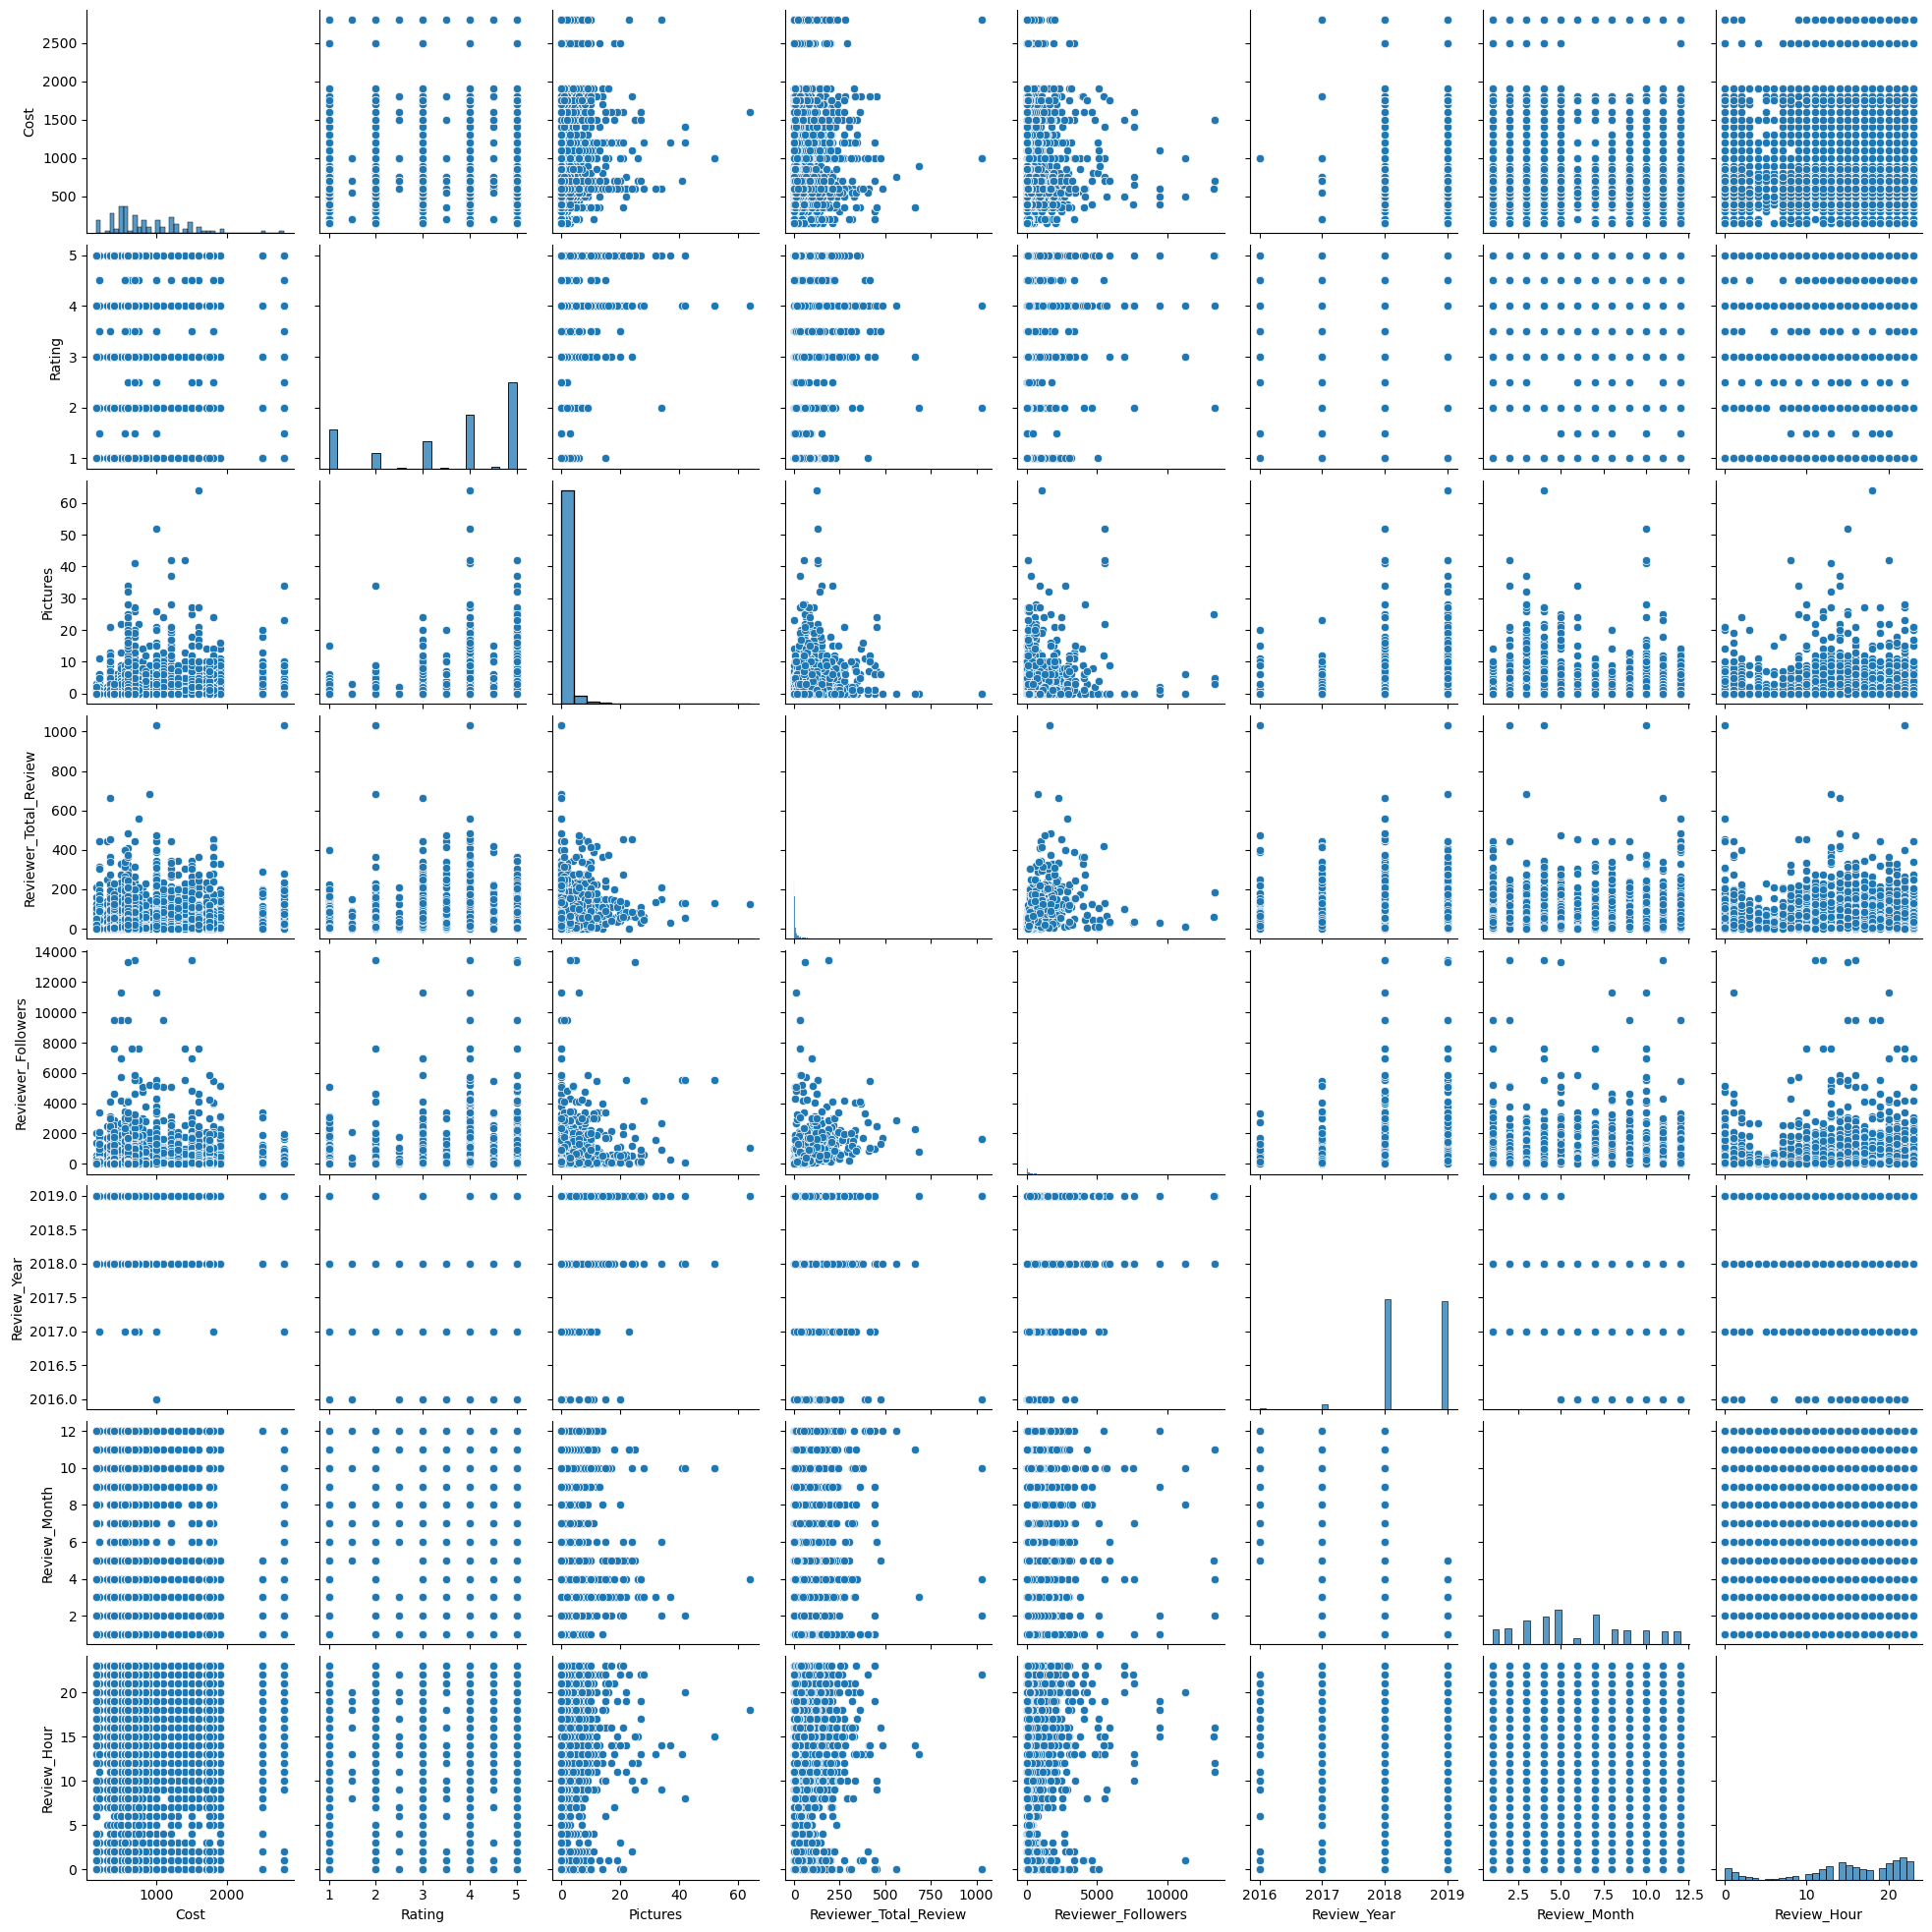

In [79]:
# Pair Plot visualization code
sns.pairplot(merged);

1. Why did you pick the specific chart?

   Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

   Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

2. What is/are the insight(s) found from the chart?

   Price and Rating are Uncorrelated: A weak linear relationship exists between Cost and Rating, showing that price is not a reliable predictor of a restaurant's quality.

   Reviewer Engagement Drives Popularity: There is a strong positive correlation between Reviewer_Total_Review, Pictures, and Reviewer_Followers. Reviewers who contribute more and upload photos tend to have a larger following.

### ***5. Hypothesis Testing***

#### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that are reviewed by reviewers with more followers will have a higher rating.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1 

---

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [82]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model(Ordinary least value)
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]

print(p_value)
if p_value < 0.05:
    print("Reject Null Hypothesis - There is a statistically significant relationship between the cost of a restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is no statistically significant relationship between the cost of a restaurant and the rating it receives.")

4.595644071494242e-47
Reject Null Hypothesis - There is a statistically significant relationship between the cost of a restaurant and the rating it receives.


C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\3371861543.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]



1. Which statistical test have you done to obtain P-Value?

   I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating.

2. Why did you choose the specific statistical test?

   I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf

# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]
print(p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


0.0004760318830883233
Reject Null Hypothesis


C:\Users\Siddharth Shukla\AppData\Local\Temp\ipykernel_12096\4195590301.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]



1. Which statistical test have you done to obtain P-Value?

   For the second hypothesis, I have used Simple Linear Regression Test.

2. Why did you choose the specific statistical test?

   I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3 

---

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [87]:
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
print(f"P-value: {p}\n")

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

P-value: 0.0

Reject Null Hypothesis


1. Which statistical test have you done to obtain P-Value?

   For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

2. Why did you choose the specific statistical test?

   I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.